# Lesson 2. Performing Thermodynamic Calculations

<b>Recommended preliminary knowledge:</b> Knowledge gained in lesson 1 and corresponding recommended preliminary knowledge. Furthermore, the user is encouraged to familiarize themselves with the Python package <i>matplotlib</i>, which is useful for plotting results.

Development of thermodynamic modelling functions: Xiaodong Liang<br>
Jupyter Notebook author: Daniel Qvistgaard

## 1. Introduction
Lesson 1 taught you how to set the engine up for running thermodynamic calculations, but no calculations have been made yet. This lesson will introduce thermodynamic calculations for the first time. To fully utilize this document, it is <b>heavily</b> suggested to be familiar with the contents of Lesson 1.

## 2. Initialization
In order for any code blocks to properly work in this Jupyter Notebook, please run the following code block. This piece of code loads the CERE package containing thermodynamical functions. Furthermore, <i>Numpy</i> and <i>matplotlib</i> are loaded.

In [1]:
from pythermo import pythermo as pt #Required
import numpy as np #Recommended
from matplotlib import pyplot as plt #Recommended - used for plotting

## 3. Python Functions

<b>[3.1 Essential](#3.1-Essential)</b><br>
The following two functions are essential to performing any thermodynamic calculations, and thus must be used.
- Setup_Thermo
- Finishup_Thermo

<b>[3.2 Calculations](#3.2-Calculations)</b><br>
The following list of functions include all the thermodynamic properties the package is capable of calculating.


- PBubble
- LiqRho
- TBubble
- PDew
- TDew
- PTFlash
- PhaseEnvelope
- TXYdiagram
- PXYdiagram
- TernaryXYDiagram
- FugacityCoeff
- DerivedProps
- StaticPermittivity
- StabilityAnalysis

### 3.1 Essential

<b>Setup_Thermo & Finishup_Thermo</b><br>
These two functions are the only essential functions, when it comes to running thermodynamic calculations. These functions <b>must</b> be used every time thermodynamic calculations are to be made. The point of these functions is to run <i>Setup_Thermo</i> just before thermodynamic calculations are performed, and <i>Finishup_Thermo</i> is run after thermodynamic calculations have been concluded. Engine preparations must be done <b>before</b> calling Setup_Thermo(). A document containing thermodynamic calculations must adhere to the following structure.
***
<i>
Thermo = pt.Model()

    ..... Preparing the engine (see lesson 1) .....
    
Thermo.Setup_Thermo()
    
    ..... Running thermodynamic calculations .....
    
Thermo.Finishup_Thermo()
</i>
***

Let's take a look at a simple example, where the engine is set up, and calculations are run.

In [2]:
#The engine is prepared using the method learned in Lesson 1. Here is an example with pure water modelled with CPA.
Thermo = pt.Model()
Thermo.ChooseAModel(1) # 1 - CPA
Thermo.NoPureComp(1)
Thermo.CritProps(1, 647.29, 220.64000, 0.3449)
Thermo.CPAParams(1, 14.515, 1017.3, 0.6736)
Thermo.AssocParams(1, 22, 69.2, 2003.2)

#Now we are prepared to run calculations. In this example nothing happens, but once calculation functions are introduced,
#we will show examples with actual calculations.
Thermo.Setup_Thermo()

    #Run any desired calculations here.

Thermo.Finishup_Thermo()


### 3.2 Calculations

<b>PBubble</b><br>
This function is used to calculate the bubble pressure of a pure component or mixture. For pure components, the bubble pressure is equal to vapor pressure.<br>

<i>P, LnK, ierr = PBubble(T, Moles, Pini)</i>
- T: Temperature [K]
- Moles: Python list mole fraction of each compound. 
- Pini: Initial guess for pressure (optional, default = 1 bar)
- P: Bubble pressure [bar]
- LnK: logarithm of K-factors
- ierr: successful or not (ierr=0 means successful

Typically <i>Pini</i> can be left empty, but if calculations give weird results, it may help to give the engine a better initial guess.<br>
The <i>moles</i> list must have a length equal to the amount of compounds in the system. As an example, a system containing 40% component 1 and 60% component 2 would have <i>moles = [0.4, 0.6]</i>

In [3]:
#The engine is prepared using the method learned in Lesson 1. Here is an example with pure water modelled with CPA.
Thermo = pt.Model()
Thermo.ChooseAModel(1) # 1 - CPA
Thermo.NoPureComp(1)
Thermo.CritProps(1, 647.29, 220.64000, 0.3449)
Thermo.CPAParams(1, 14.515, 1017.3, 0.6736)
Thermo.AssocParams(1, 22, 69.2, 2003.2)

#We are now ready to run calculations
Thermo.Setup_Thermo()

#In this example, the vapor pressure of water is investigated at boiling point (373K). PBubble is run as described above.
T = 373
moles = [1.0]
P, LnK, ierr = Thermo.PBubble(T,moles)

Thermo.Finishup_Thermo()

#The results are now printed
print("Bubble pressure of water at 100C: "+ str(P) + " bar")

if ierr == 0:
    print("No errors")
else:
    print("Error")

Bubble pressure of water at 100C: 0.996501681049375 bar
No errors


The bubble pressure of water has successfully been calculated without errors. Let's try a similar calculation, where the vapor pressure curve of water over a temperature range of 0-100C is used.

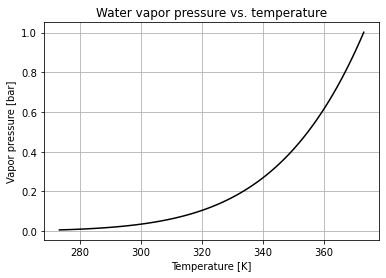

In [4]:
#The engine is prepared using the method learned in Lesson 1. Here is an example with pure water modelled with CPA.
Thermo = pt.Model()
Thermo.ChooseAModel(1) # 1 - CPA
Thermo.NoPureComp(1)
Thermo.CritProps(1, 647.29, 220.64000, 0.3449)
Thermo.CPAParams(1, 14.515, 1017.3, 0.6736)
Thermo.AssocParams(1, 22, 69.2, 2003.2)

#We are now ready to run calculations
Thermo.Setup_Thermo()

#In this example, the vapor pressure of water is investigated at a temperature range of 273K-373K. The temperature curve
#consist of N linearly spaced points.

N = 100 #Amount of linearly spaced temperatures
T = np.linspace(273.15, 373.15, N) #This is a numpy command dedicated to creating a linearly spaced sequence of temperatures
P = np.zeros(N) #An empty numpy array is created for memory allocation, and filled later
moles = [1.0]

for i in range(0,N): #The role of this for-loop is to compute the bubble pressure at each temperature in the sequence
    P[i], LnK, ierr = Thermo.PBubble(T[i],moles) #Here the empty numpy array is filled step by step.

Thermo.Finishup_Thermo()


#Now that thermodynamic calculations have been completed, it is time to visualize the results. Here the matplotlib package
#is utilized. It is adviced that you become familiar with this package, or find a similar alternative.
plt.plot(T,P,'black')
plt.xlabel('Temperature [K]')
plt.ylabel('Vapor pressure [bar]')
plt.grid()
plt.title('Water vapor pressure vs. temperature')
plt.show()